In [1]:
get_ipython().system(' pip install PyGithub')
get_ipython().run_line_magic('matplotlib', 'notebook')

In [2]:
# Import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Import GitHub 'personal access key' to be able to pull source coronavirus data from John Hopkins' public GitHub repo
from config import git_key

In [4]:
# Create defined function to pull an individual data set from GitHub
def corona_df(git_key, branch):
    from github import Github
    import requests
    import io
    # First create a Github instance  using username and password
    # g = Github("user", "password")
    # # or using an access token
    g = Github(git_key)
    
    # Specific GitHub repository name/URL for 'get_repo' request:
    repo = g.get_repo("CSSEGISandData/COVID-19")
    
    # URL for GET requests to retrieve coronavirus data:
    contents = repo.get_contents(branch)
    
    # Reading source data (.csv files) from GitHub branch and decode, returning a Pandas dataframe:
    df = pd.read_csv(io.StringIO(contents.decoded_content.decode('utf-8')))
    return df

In [5]:
# Pull "APIs" using defined formula above
confirmed_df = corona_df(git_key,"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
deaths_df = corona_df(git_key,"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
recovered_df = corona_df(git_key,"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")

In [6]:
# View Confirmed cases data
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,591,665,733,779,830,860,889,910,934,950
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,274,297,315,326,337,342,352,366,372,375
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,411,426,428,468,486,505,518,529,537,544
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,215,224,239,250,261,267,272,279,281,285
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,62,67,79,83,83,86,87,90,90,90


In [7]:
#Define function for cleaning the data
def clean_df(df):
    
    df = df.fillna(value=0)                                          # Fill NaN with zero values
    df = df.drop(columns=[ "Lat", "Long"])                           # Drop "Lat" "Long" for raw number data
    df = df.groupby(['Country/Region'], as_index=False).agg('sum')   # Create groupby object for sorting by country/region and aggregate
    df = df.set_index(["Country/Region"])                            # Define new index
    df = df.astype(int)                                              # Set all values as integers
    df = df.sort_values(by=df.columns[-1], ascending=False)          # Sort by highest value of most recent recorded date

    return df

In [8]:
# Initiate new formula for all data sets and assign to variables
df_deaths_clean = clean_df(deaths_df)
df_confirmed_clean = clean_df(confirmed_df)
df_recovered_clean = clean_df(recovered_df)

In [9]:
# View top 10 rows of clean, sorted Confirmed cases data
df_confirmed_clean.head(10)

# Note: "Others" as a 'Country/Region' means a cruise ship. 
# (JB confirmed in the raw Confirmed cases data: 
# "Diamond Princess cruise ship" appears in that "Others" row 'Province/State' field.)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,547,639,916,1399,2062,2863,5494,6070,8124,9783,...,30553,34075,36778,39790,42306,44327,44699,59832,66292,68347
Others,0,0,0,0,0,0,0,0,0,0,...,0,61,61,64,135,135,175,175,218,285
Singapore,0,1,3,3,4,5,7,7,10,13,...,28,30,33,40,45,47,50,58,67,72
Hong Kong,0,2,2,5,8,8,8,10,10,12,...,24,25,26,29,38,49,50,53,56,56
Japan,2,1,2,2,4,4,7,7,11,15,...,45,25,25,26,26,26,28,28,29,43
Thailand,2,3,5,7,8,8,14,14,14,19,...,25,25,32,32,32,33,33,33,33,33
South Korea,1,1,2,2,3,4,4,4,4,11,...,23,24,24,25,27,28,28,28,28,28
Malaysia,0,0,0,3,4,4,4,7,8,8,...,12,12,16,16,18,18,18,19,19,22
Taiwan,1,1,3,3,4,5,8,8,9,10,...,16,16,17,18,18,18,18,18,18,18


In [10]:
# View top 10 rows of clean, sorted Deaths data
df_deaths_clean.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,17,18,26,42,56,82,131,133,171,213,...,632,717,804,904,1011,1111,1116,1368,1520,1662
Hong Kong,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
France,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
Philippines,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Sri Lanka,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Singapore,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
South Korea,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Spain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# View top 10 rows of clean, sorted Recovered cases data
df_recovered_clean.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/06/20,2/07/20,2/08/20,2/09/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,28,30,36,39,49,58,101,120,135,214,...,1476,1998,2595,3218,3917,4635,5079,6213,7973,9294
Singapore,0,0,0,0,0,0,0,0,0,0,...,0,0,2,2,2,9,15,15,17,18
Japan,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,4,9,9,9,9,12
Thailand,0,0,0,0,2,2,5,5,5,5,...,5,5,10,10,10,10,10,12,12,12
South Korea,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,3,3,7,7,7,9
Australia,0,0,0,0,0,0,0,0,2,2,...,2,2,2,2,2,2,2,8,8,8
Malaysia,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,3,3,3,3,7
Vietnam,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,6,6,7,7,7
France,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,4


In [12]:
# Define function to plot line chart of # people by country over time
def myplot(ax, x_axis, country, df):
    import random
    marker = ["o","1","2","3","4","s","p","h","x","+", "d"]
    ax.plot(x_axis, df.iloc[country,:], marker=random.choice(marker), linestyle="--", label=df.index[country])

# Define function to plot full plot with top 10 lines in a given df
def myplot_full(fig, ax, df, title):
    myplot(ax, df.columns, 1, df)
    myplot(ax, df.columns, 2, df)
    myplot(ax, df.columns, 3, df)
    myplot(ax, df.columns, 4, df)
    myplot(ax, df.columns, 5, df)
    myplot(ax, df.columns, 6, df)
    myplot(ax, df.columns, 7, df)
    myplot(ax, df.columns, 8, df)
    myplot(ax, df.columns, 9, df)
    myplot(ax, df.columns, 10, df)

    ax.set(xlabel="Days (MM/DD/YY)", ylabel="People", title=title)

    plt.xticks(df.columns, df.columns, rotation=90);
    ax.grid();
    ax.legend();

# Define fig saving function
def fig_save(fig, file_name):
    import os
    path = os.path.join("images", file_name)
    fig.savefig(path)

<IPython.core.display.Javascript object>


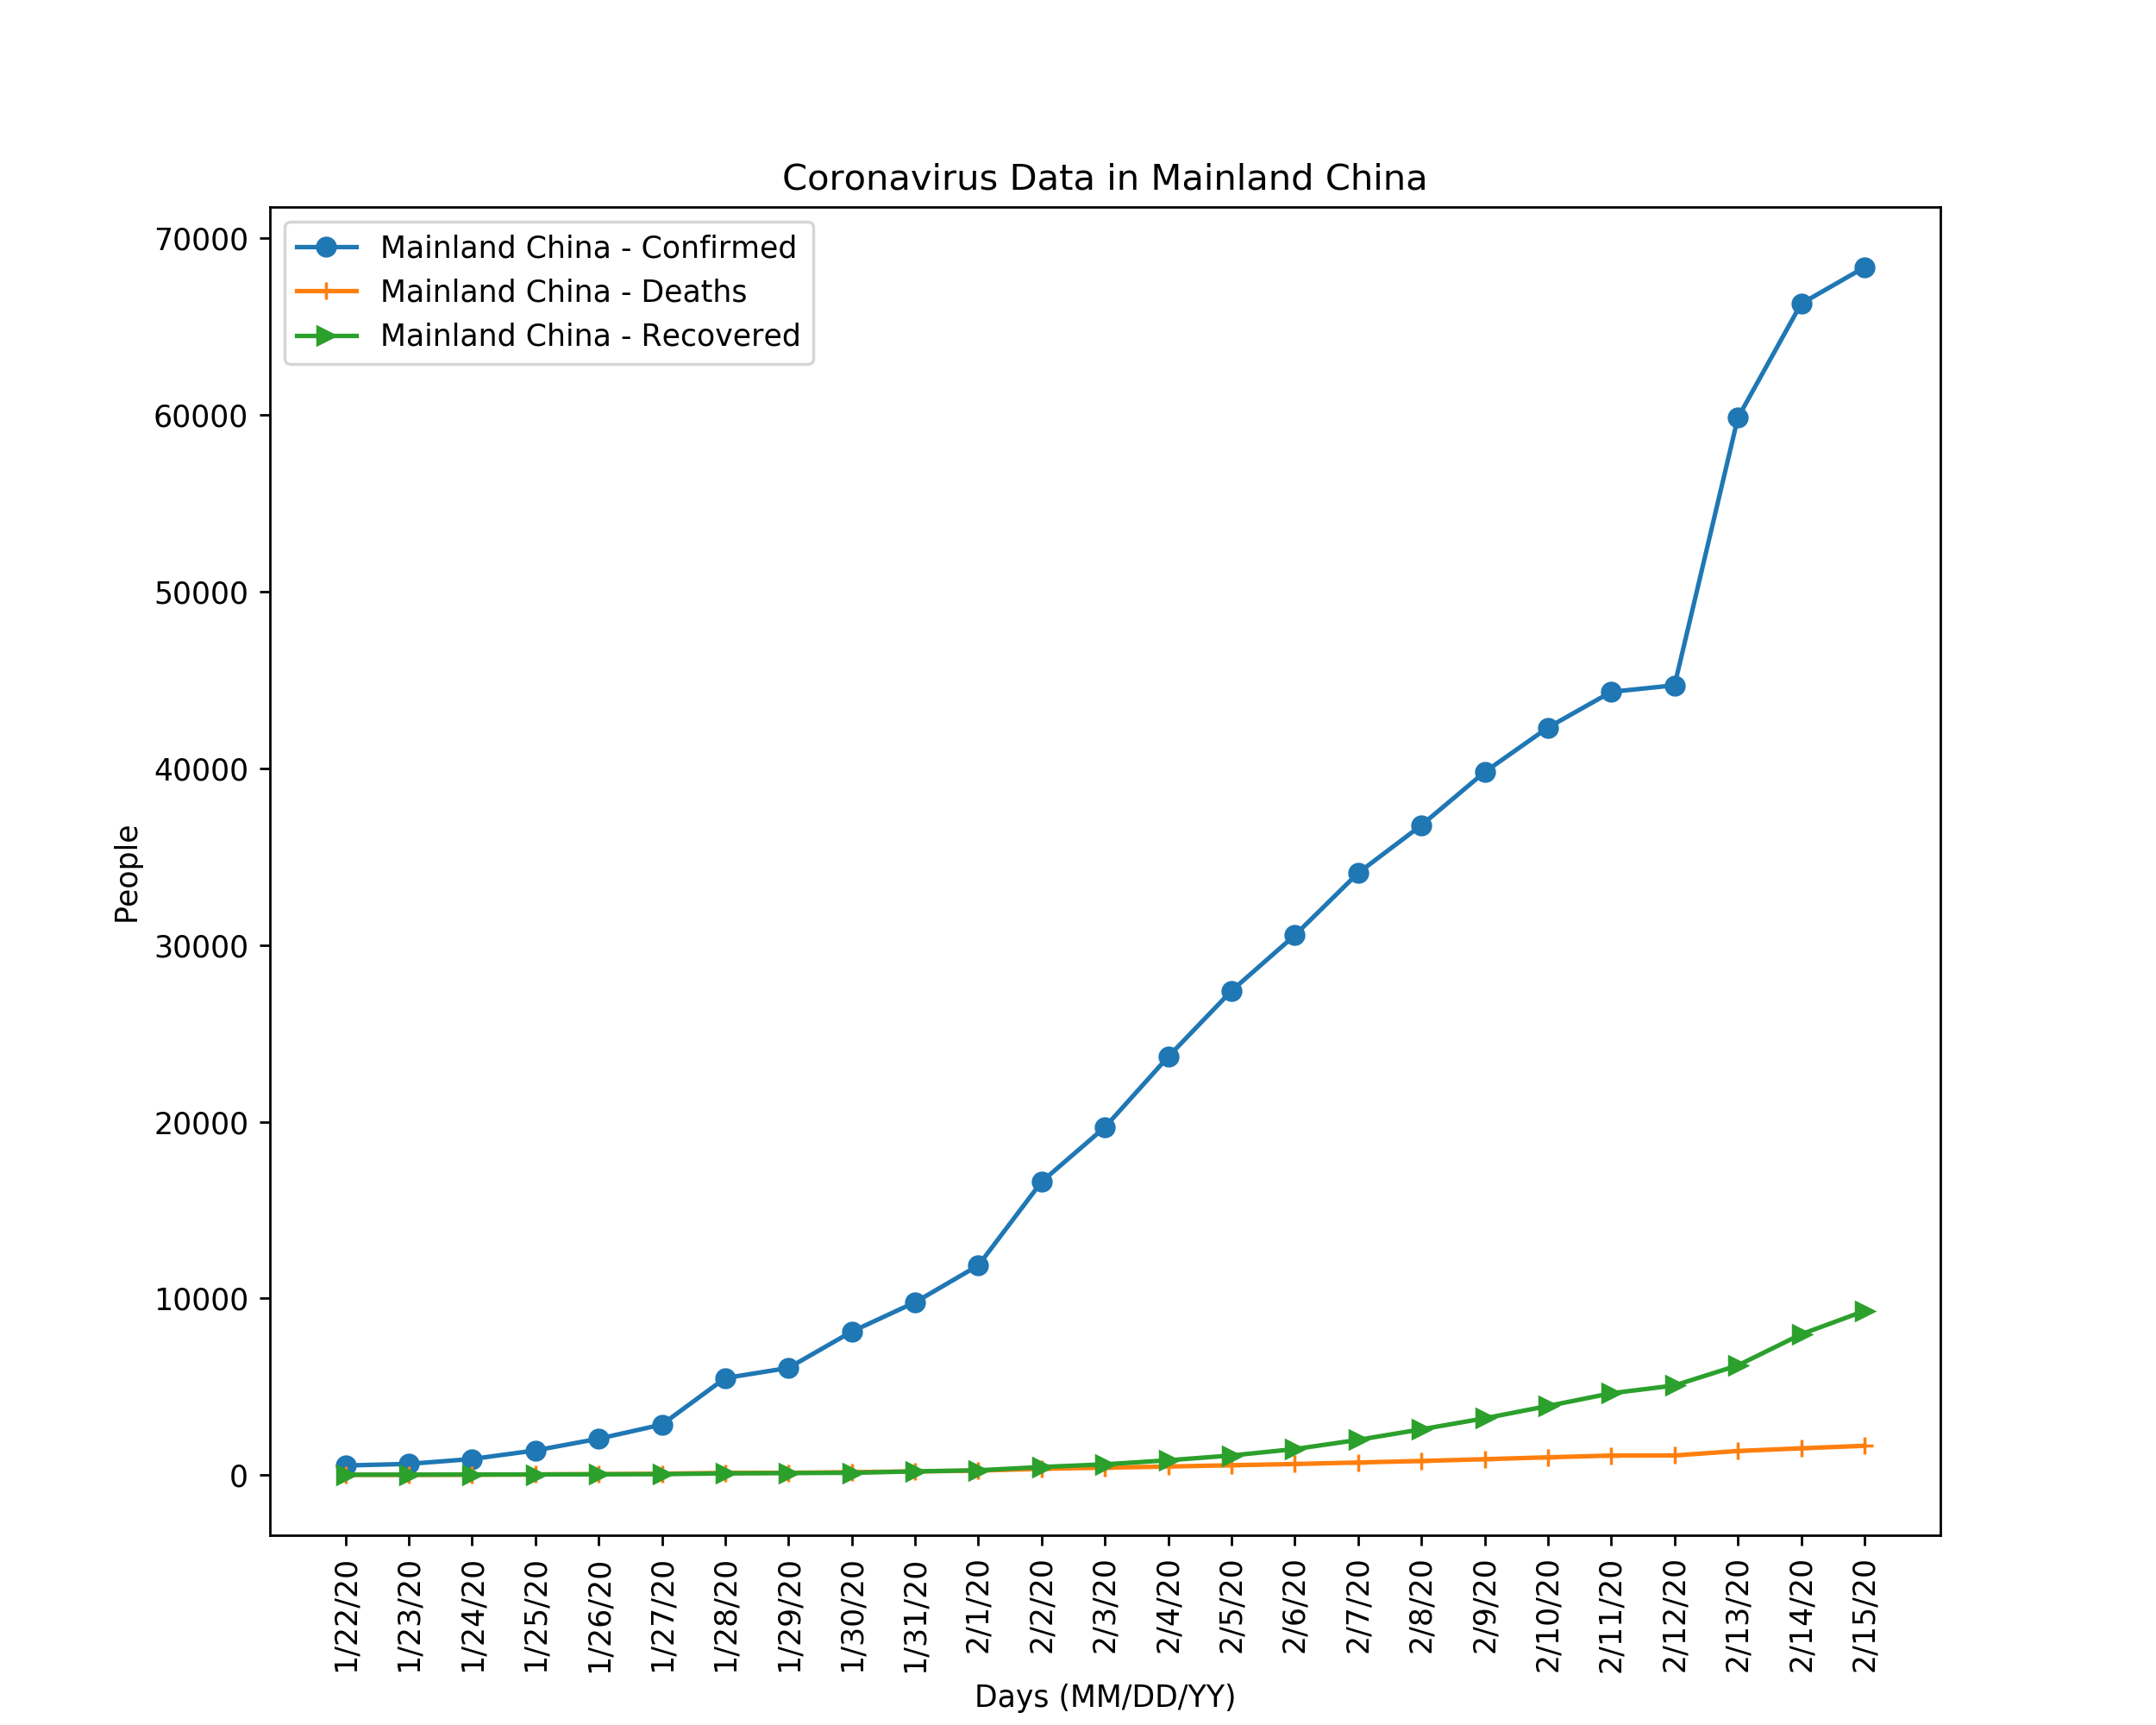

In [13]:
# Plot to show Mainland China Data over time
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(df_deaths_clean.columns, df_confirmed_clean.loc["Mainland China",:], label="Mainland China - Confirmed", marker="o");
ax.plot(df_deaths_clean.columns, df_deaths_clean.loc["Mainland China",:], label="Mainland China - Deaths", marker="+");
ax.plot(df_deaths_clean.columns, df_recovered_clean.loc["Mainland China",:], label="Mainland China - Recovered", marker=">");
plt.xticks(df_deaths_clean.columns, df_deaths_clean.columns, rotation=90);
ax.legend();
ax.set(xlabel="Days (MM/DD/YY)", ylabel="People", title="Coronavirus Data in Mainland China")

fig_save(fig, "coronavirusdata_mainlandchina")

<IPython.core.display.Javascript object>


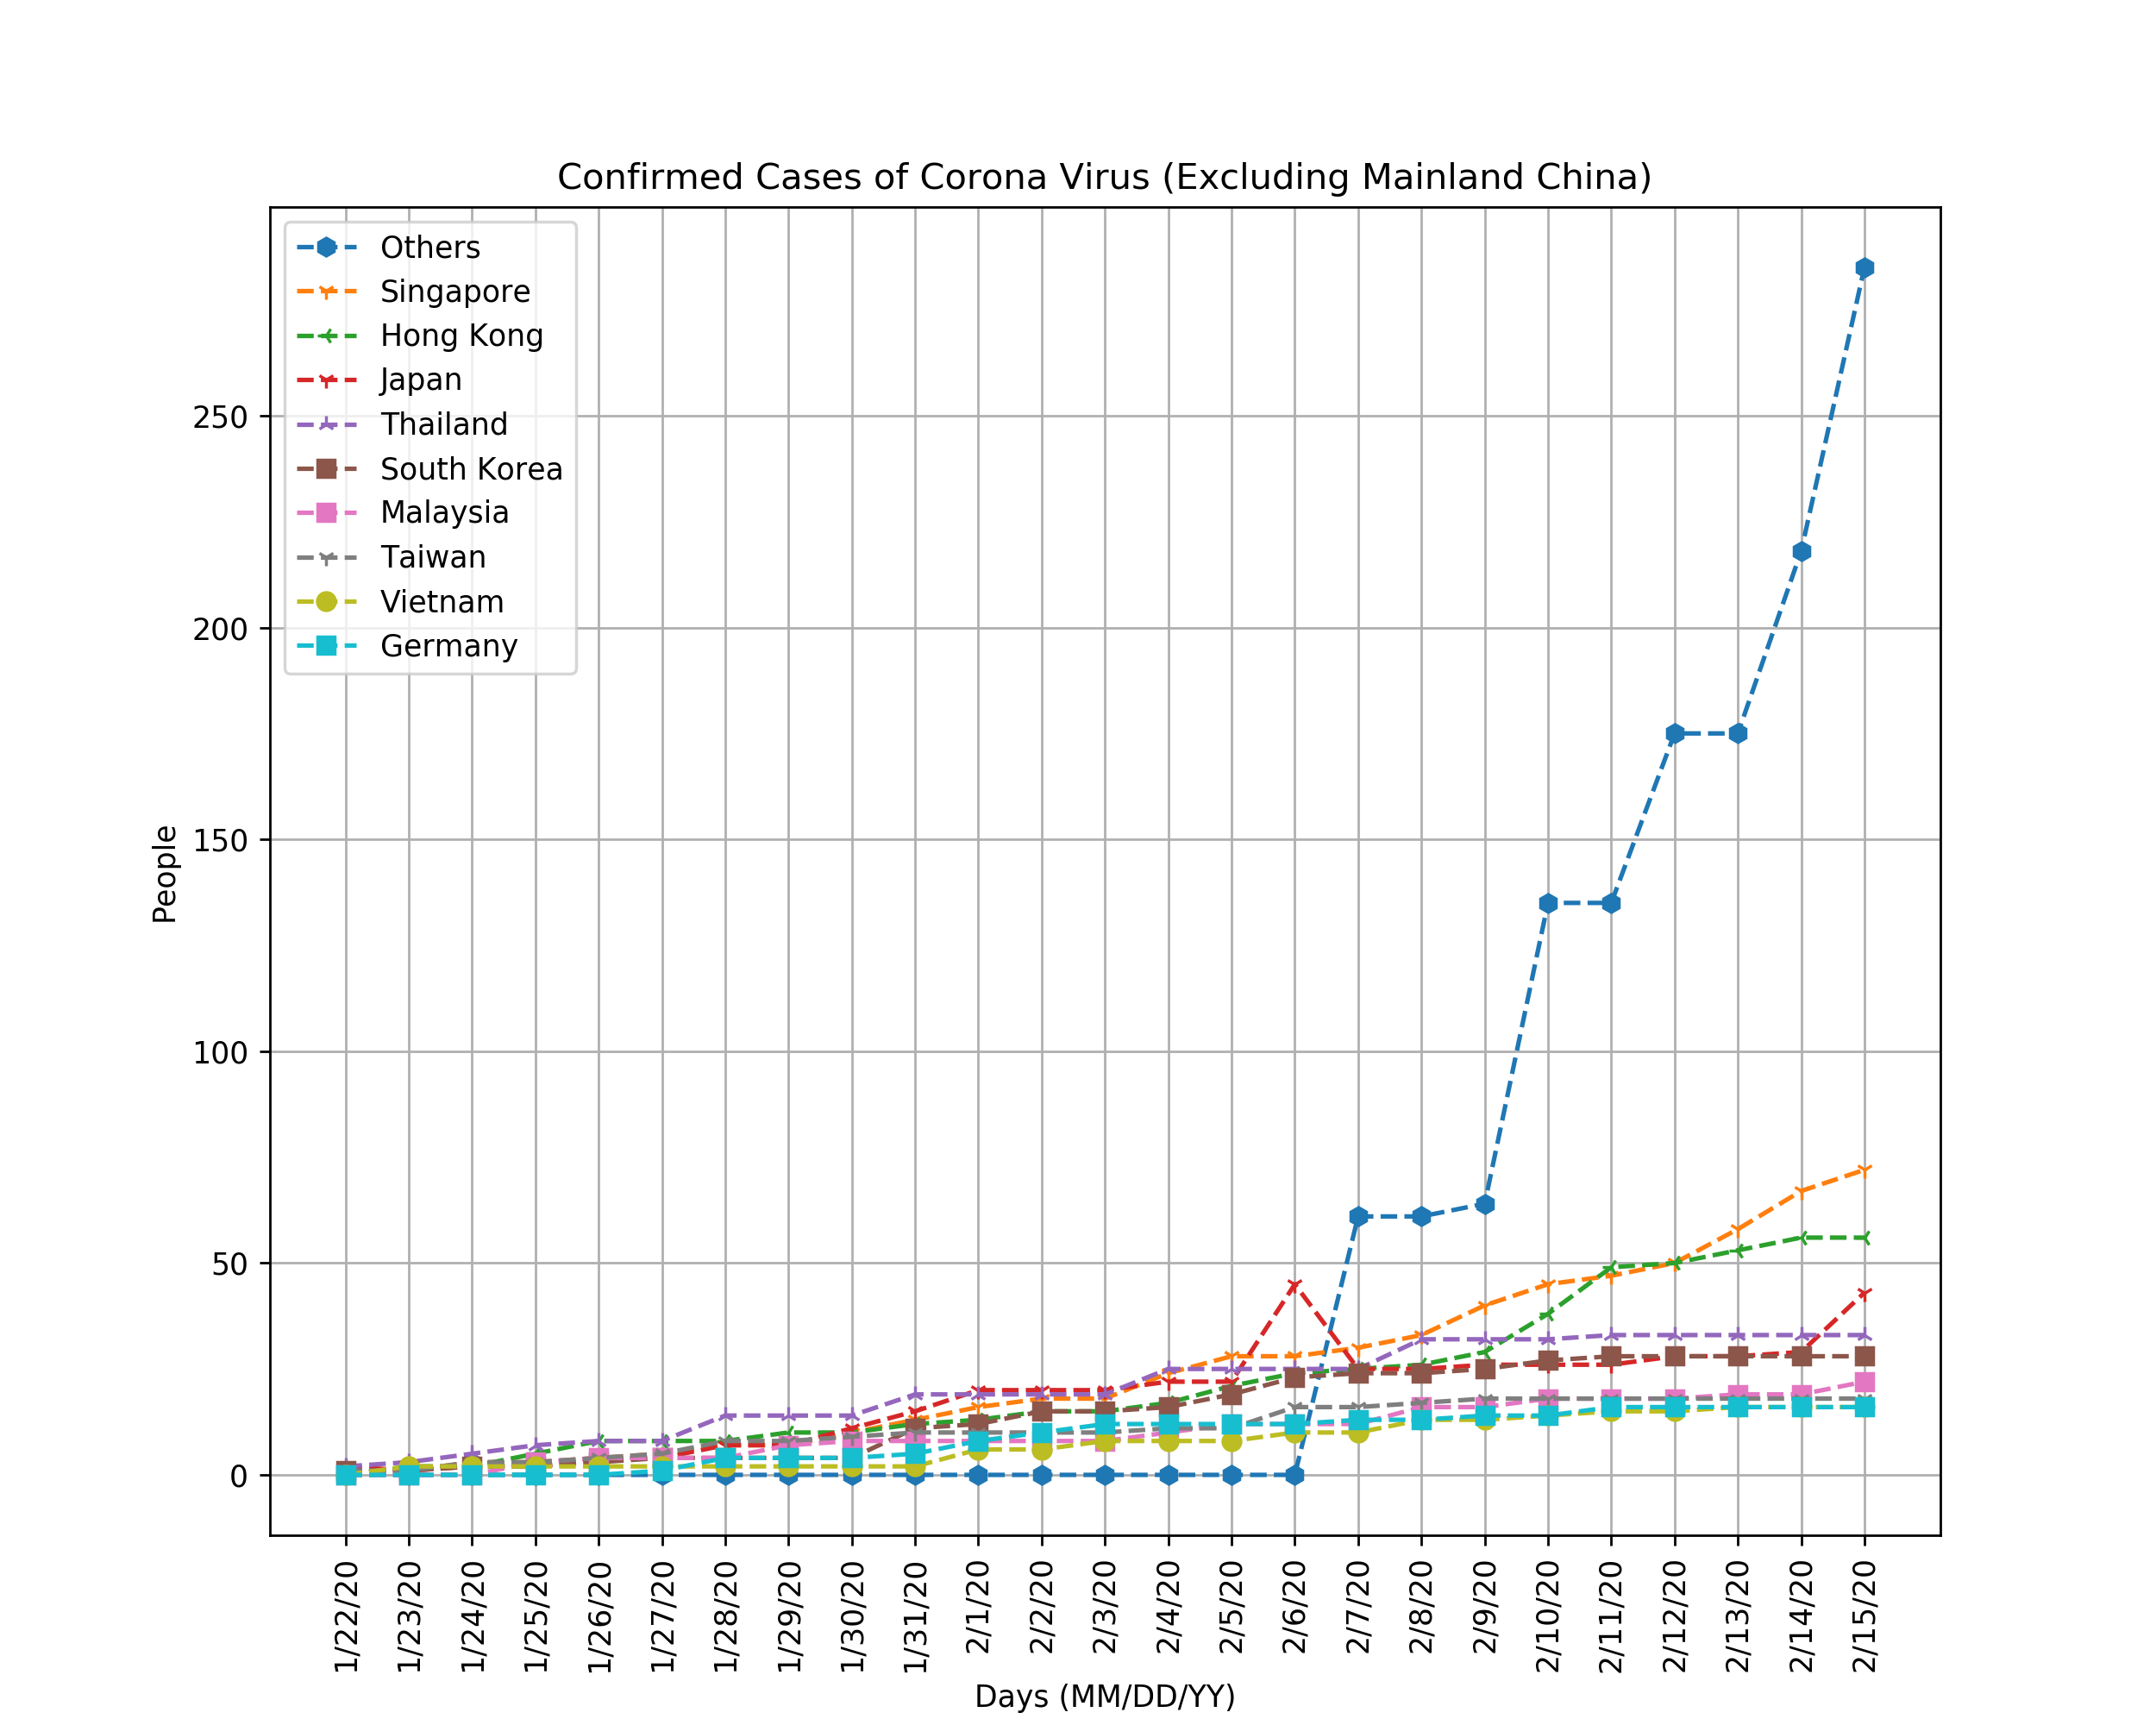

In [14]:
fig2, ax2 = plt.subplots(figsize=(10,8))
myplot_full(fig2, ax2, df_confirmed_clean, "Confirmed Cases of Corona Virus (Excluding Mainland China)")
fig_save(fig2, "confirmed_othercountries")

<IPython.core.display.Javascript object>


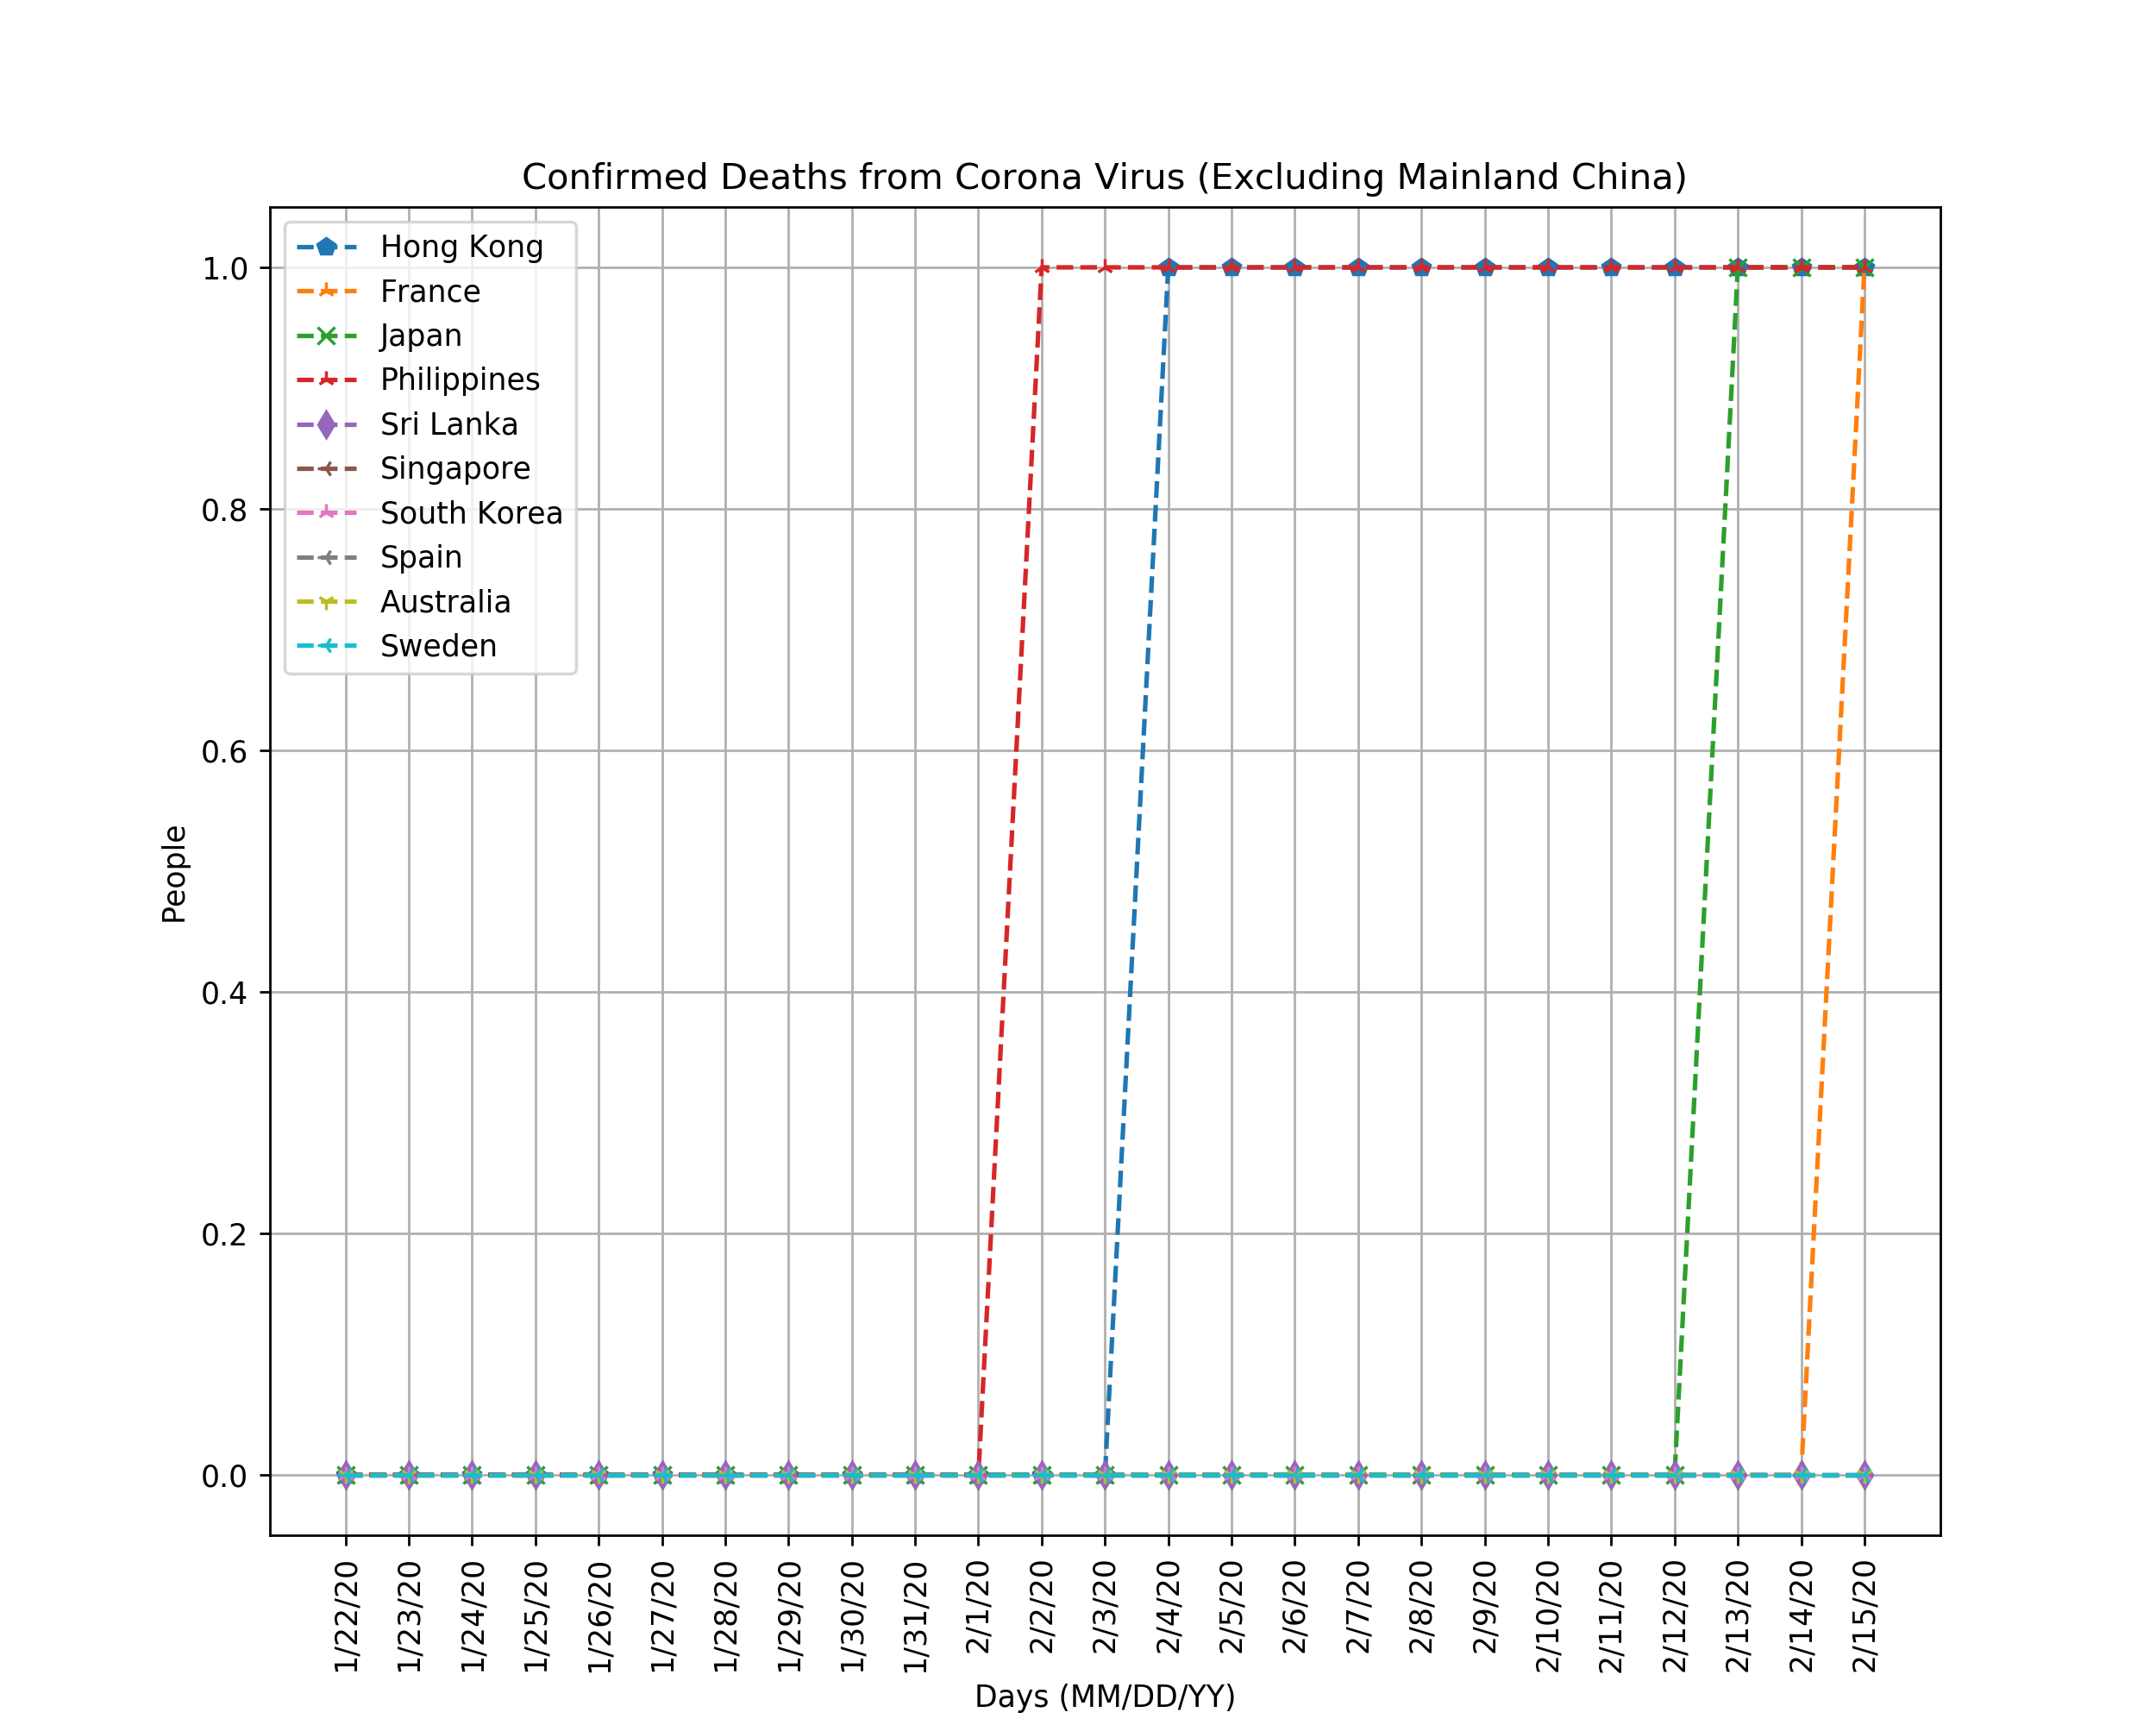

In [15]:
fig3, ax3 = plt.subplots(figsize=(10,8))
myplot_full(fig3, ax3, df_deaths_clean, "Confirmed Deaths from Corona Virus (Excluding Mainland China)")
fig_save(fig3, "deaths_othercountries")

<IPython.core.display.Javascript object>


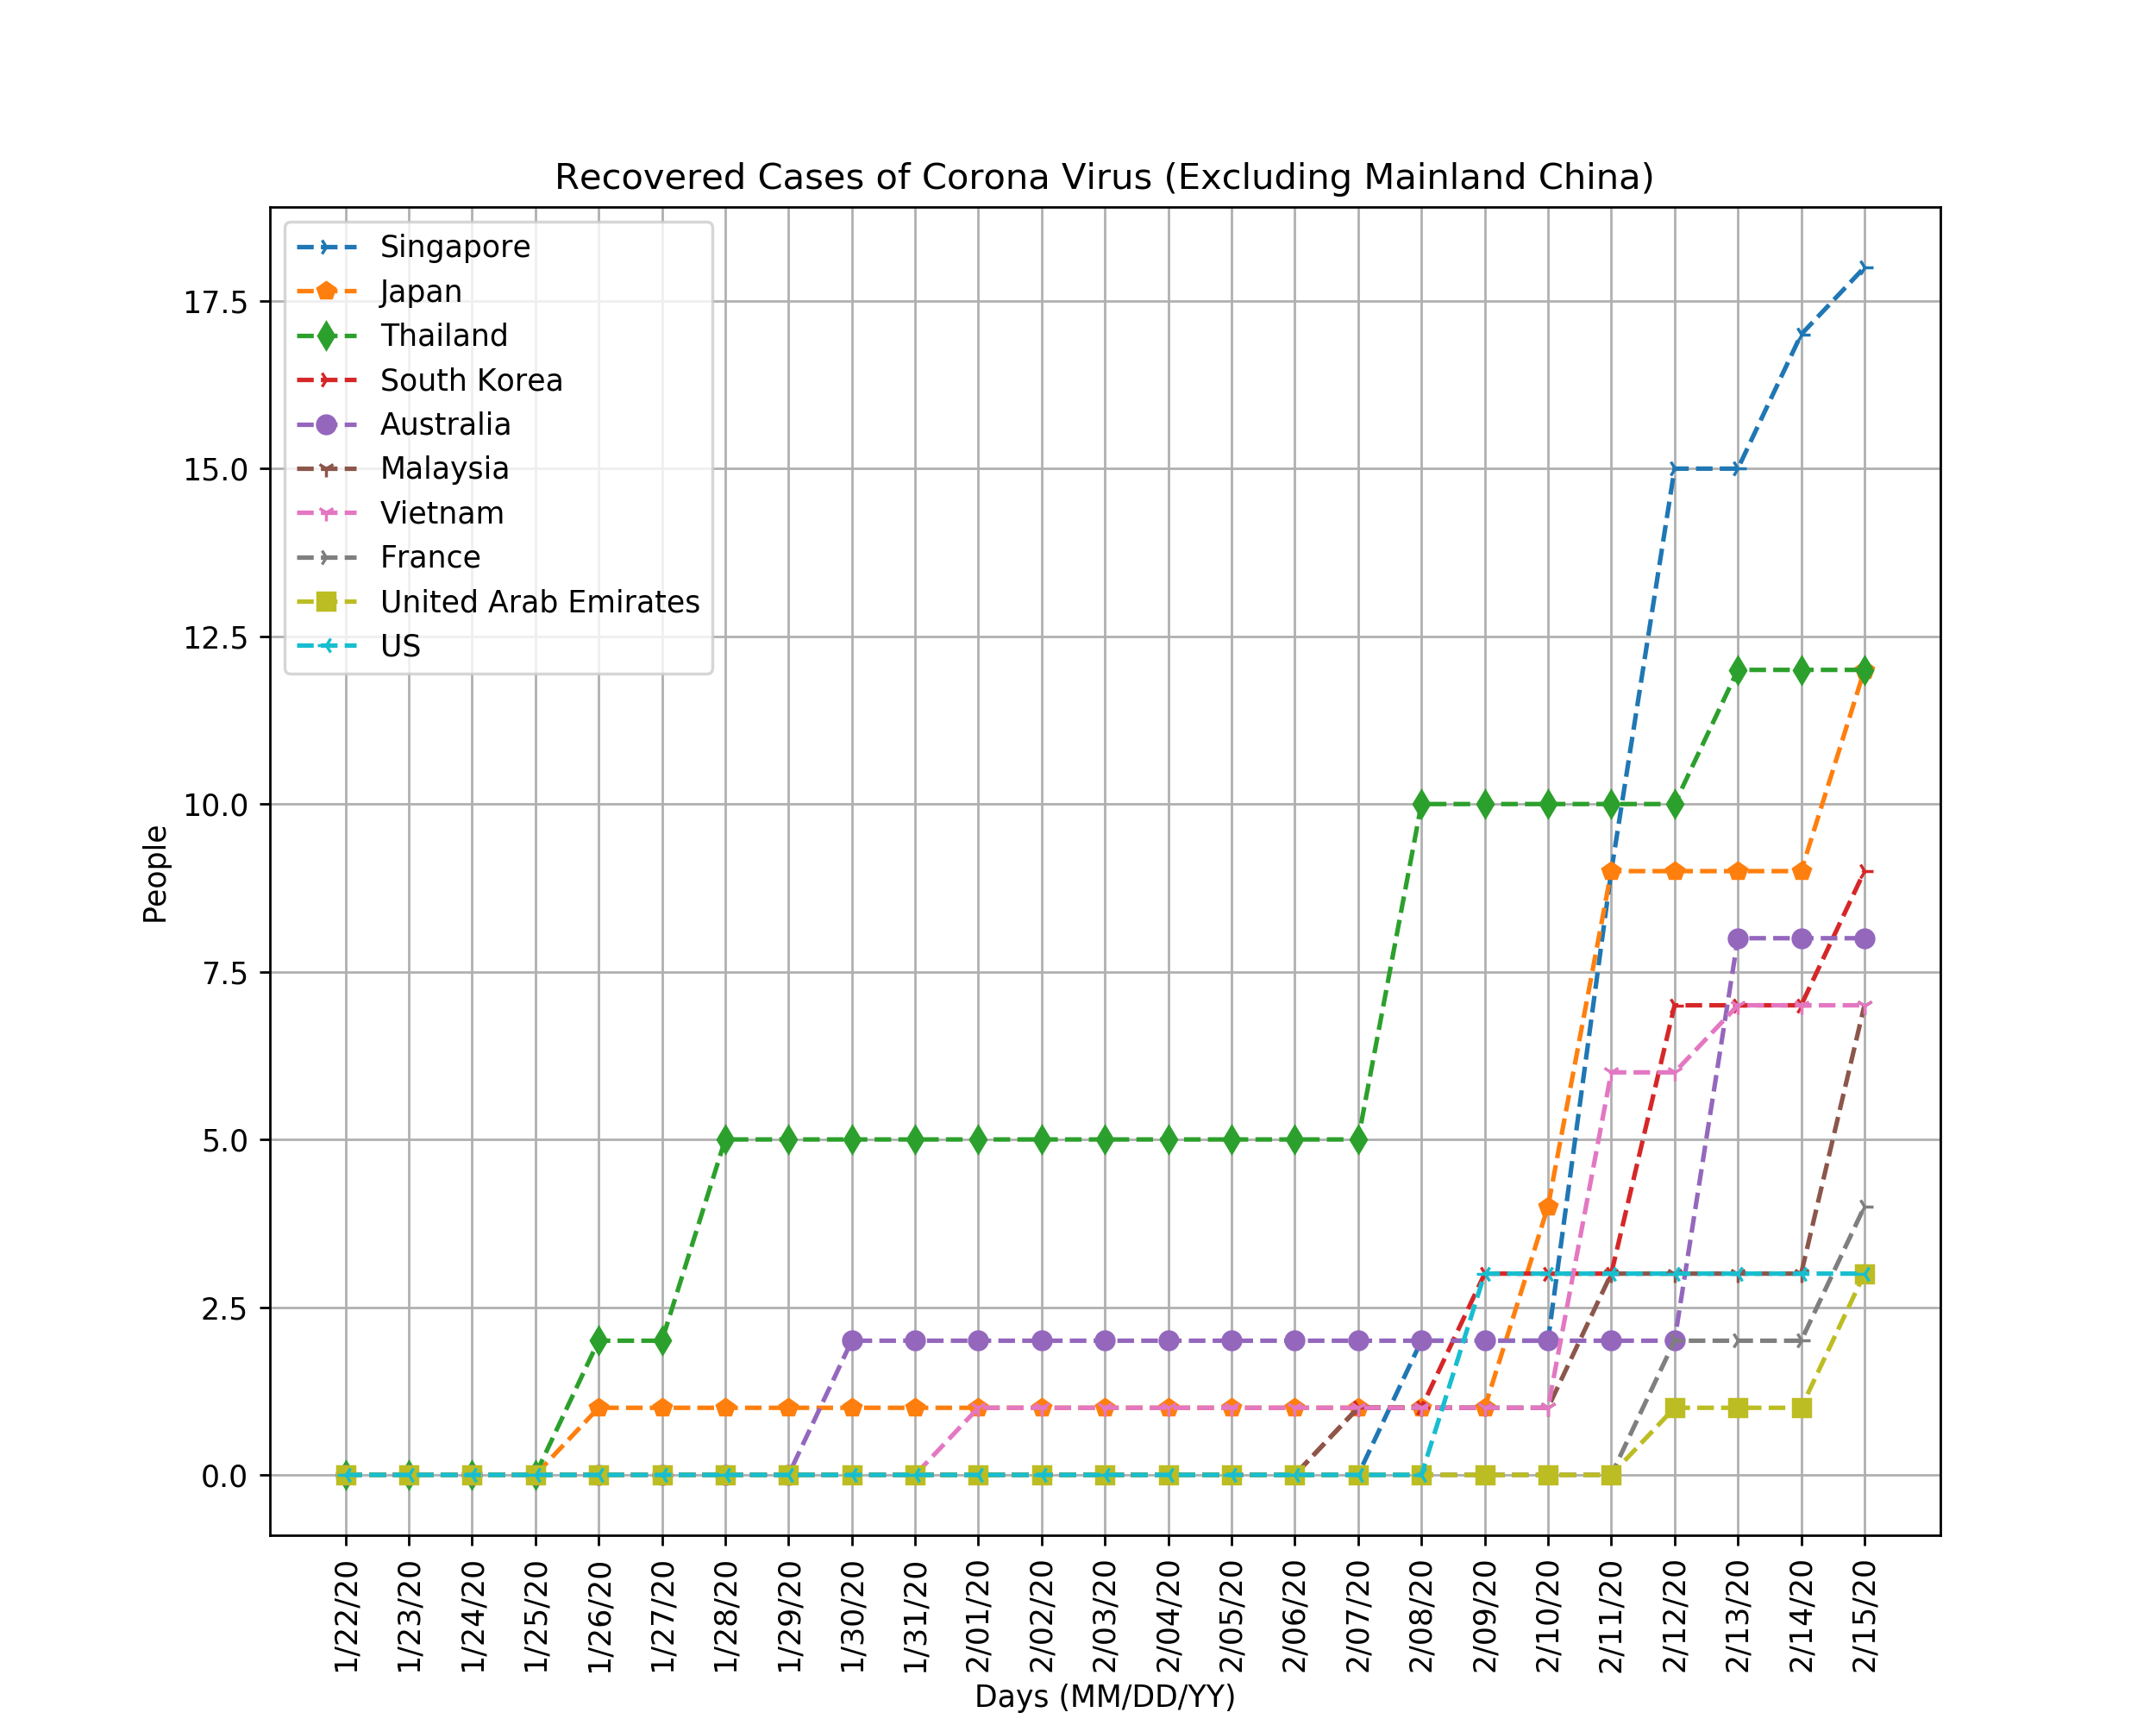

In [16]:
fig4, ax4 = plt.subplots(figsize=(10,8))
myplot_full(fig4, ax4, df_recovered_clean, "Recovered Cases of Corona Virus (Excluding Mainland China)")
fig_save(fig4, "recovered_othercountries")